In [13]:
#tensorflow进行矩阵的乘法
import tensorflow as tf

a=tf.constant([[4,5]])
b=tf.constant([[4],[6]])
c=tf.matmul(a,b)
with tf.Session() as sess:
    result=sess.run(c)
    print(result)
    


[[46]]


In [19]:
#tensorflow变量初始化
import numpy as np
import tensorflow as tf
#利用numpy arange创建的是int64为
a=np.arange(6).reshape(2,3)
var=tf.Variable([[4,5,6],[8,5,6]],dtype=tf.int64)
const=tf.constant(a)
#进行减法运算
sub=tf.subtract(var,const)
#进行乘法运算
chengfa=tf.add(var,const)
#对变量初始化
init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print sess.run(sub)
    print sess.run(chengfa)


[[4 4 4]
 [5 1 1]]
[[ 4  6  8]
 [11  9 11]]


In [26]:
#tensorflow的赋值不能直接通过等号
var2=tf.Variable(0)
add=tf.add(var2,1)
#把add的值赋值给var
update=tf.assign(var2,add)
init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(5):
        print sess.run(update)

1
2
3
4
5


In [29]:
#tensorflow中的fetch
sess.run(里面可以是多个节点)

SyntaxError: invalid syntax (<ipython-input-29-af9c4a411ffc>, line 2)

In [38]:
#tensorflow占位符（占位符要指定元素的类型）
#以及feed_dict赋值
a=tf.placeholder(tf.float32)
b=tf.placeholder(tf.float32)
mau=tf.subtract(a,b)
with tf.Session() as sess:
    print sess.run(mau,feed_dict={a:[1.],b:[5.4]})

[-4.4]


In [46]:
#numpy产生随机数
x_data=np.random.uniform(1,10,size=(2,3))#
print x_data

[[5.0636423  5.10963473 6.80813201]
 [1.01134086 3.08695622 9.95805738]]


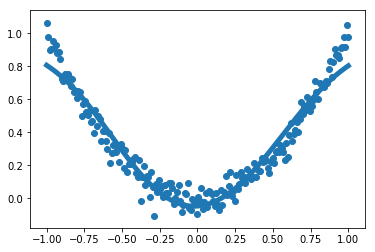

In [72]:
#tensoprflow实现的拟合曲线
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#产生随机数据
x_data=np.linspace(-1,1,200)[:,np.newaxis] #使其从1行300列变为300行1列
noise=np.random.normal(0,0.05,size=x_data.shape)
y_data=np.square(x_data)+noise
#产生占位符(作为输入数据)
x=tf.placeholder(tf.float32,[None,1])#输入的为给定的行，但列必须为1列
y=tf.placeholder(tf.float32,[None,1])
#构建神经网络的中间层(参数是随机生成的)
weight1=tf.Variable(tf.random_normal([1,10]))
basis1=tf.Variable(tf.random_normal([1,10]))
w_x_b=tf.matmul(x,weight1)+basis1
L1=tf.nn.tanh(w_x_b)#使用relu为一条直线
#构建神经网络的输出层
weight_2=tf.Variable(tf.random_normal([10,1]))
basis2=tf.Variable(tf.random_normal([1,1]))#为什么这里的偏置项为1，1因为输入层只有一个神经元所以只有一个偏置项
w_x_b2=tf.matmul(L1,weight_2)+basis2
prediction=tf.nn.tanh(w_x_b2)#也可以采用tanh()去线性化(使用relu为一条直线)

loss=tf.reduce_mean(tf.square(y-prediction))
#x学习效率为0.05
optimizer=tf.train.GradientDescentOptimizer(0.05).minimize(loss)
init=tf.global_variables_initializer()
#保存参数,创建一个saver对象
saver=tf.train.Saver()
with tf.Session() as sess:
    sess.run(init)
#将模型训练3000次
    for i in range(3000):
        sess.run(optimizer,feed_dict={x:x_data,y:y_data})
    #保存参数
    saver.save(sess,"learngit/回归参数.ckpt")
    predicton_value=sess.run(prediction,feed_dict={x:x_data})
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,predicton_value,linewidth=5)
    plt.show()


In [68]:
#tensorflow实x

















NameError: name 'impor' is not defined